# A First Empirical Exploration of Machine Learning Concepts

## Basics
In the following, we will lay out a few core definitions of Machine Learning concepts. We will then explore those concepts in simple cases.

### A Simple Regression Task

In this first exploration we will consider the *regression task* in which we are given a *training set* $S=\{(x_1,y_1),\ldots,(x_m,y_m)\}$ of *examples* $(x_i,y_i)$, where: 
+ $x_i \in {\cal X}$ is called the *input* or the *instance*, 
+ ${\cal X}$ is the *input domain*, 
+ $y_i\in{\cal Y}$ is called the *output*, the *target* or the *label* and 
+ ${\cal Y}$ the *label set*. 

Our strategy to solve the regression task is to *learn* a *model* $h:{\cal X}\rightarrow {\cal Y}$ or to "teach" a learner to come up with a prediction rule to predict the ouputs associated to the inputs. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
train = pd.read_csv("./simpledata_train.csv")
train.shape

(50, 2)

In [4]:
train.head()

,x,y
0,1.188915,-0.730554
1,-1.771694,-12.990353
2,2.199070,11.495108
3,4.570244,13.724001
4,0.688832,3.335676


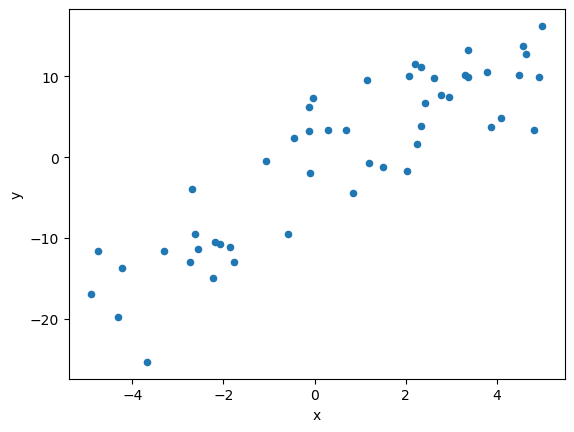

In [5]:
train.plot.scatter("x", "y")
plt.show()

### A Simple Regression Model
As a simple learner we will consider a **nearest neighbor regressor**. The nearest neighbor prediction rule is based on pooling the outputs of the nearest instances to take a decision. Given an instance $z\in{\cal X}$ the predicted output of a $k-$nearest neighbor regressor will be $$h(z)=\frac{1}{k}\sum_{i\in{N}_k(z, S)} y_i$$ where ${N}_k(z, S)$ is the set of the $k$ nearest instances in $S$ to $z$ according to a pre-specified distance.

In [6]:
from sklearn import neighbors
# #############################################################################
# Fit regression model
k = 2
X = train["x"].values[:,np.newaxis] # column matrix instead of line vector
y = train["y"]

knn = neighbors.KNeighborsRegressor(k)
knn.fit(X, y)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


To visualise the prediction rule lets compute the prediction for a range of points in the support of the instances:  

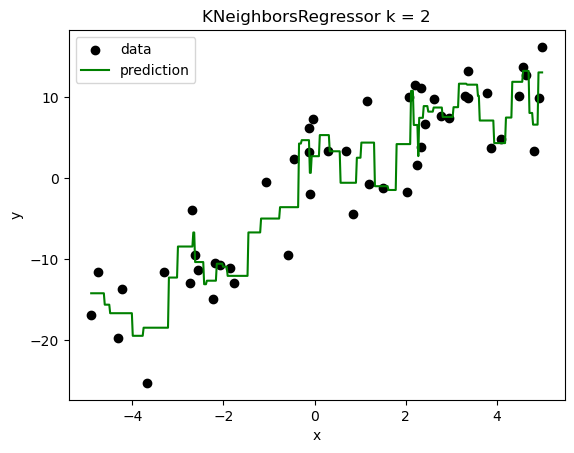

In [7]:
xsupport = pd.DataFrame(np.linspace(min(train.x),max(train.x),500))
y_ = knn.predict(xsupport) 

plt.scatter(train["x"], train["y"], c='k', label='data')
plt.plot(xsupport, y_, c='g', label='prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("KNeighborsRegressor k = " + str(k))
plt.show()

### How good is the prediction?
To measure how good the prediction rule $h_S(x)=\hat{y}$ learned over training set $S$ is for an example $(x,y)$ we compute the *squared residual error* $(\hat{y}-y)^2$. To measure how good the prediction is on a set of examples we compute a *loss function* for example the *mean squared error (MSE)*. The training error is the loss function computed over the training set: $$l(S,h_S)=\frac{1}{m} \sum_{(x_i,y_i)\in S} (h_S(x_i)-y_i)^2 $$

In [8]:
from sklearn.metrics import mean_squared_error
yhat_train = knn.predict(X)
mean_squared_error(y, yhat_train)

12.366034124597014

The training examples where generated by an unknown distribution ${\cal D}$. Another measure of success is how good is our prediction rule on unseen examples generated by the same distribution ${\cal D}$. The *generalisation error* is the loss function computed on a *test* set $E$ sampled from distribution ${\cal D}$:
$$l(E,h_S)=\frac{1}{m_E} \sum_{(x_i, y_i)\in E} (h_S(x_i)-y_i)^2 $$

> ## Questions:
> 1. What is the input domain in the simple dataset?
> 1. Compute the generalisation error using `simpledata_test.csv`.
> 1. As a loss function we could also consider the [explained variance](https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score). How does it relate to MSE? Compute training and generalisation errors for this loss function.
> 1. How dependent is the prediction on the training set? Lets assume we can ask for another training set (see next section). Compute the training and generalisation error for this new training set. Repeat the experiment several times in order to get a mean and a variance.
> 1. How dependent is the prediction on the size of the training set? Draw a plot to visualise it.
> 1. How dependent is the prediction on the hyperparameter $k$? Draw a plot to visualise it.
> 1. Relate this experiment to the bias-variance decomposition of the true error.

### Question 1

In [9]:
print(f'Min x value: {train.x.min()}')
print(f'Max x value: {train.x.max()}')

Min x value: -4.9024013755843
Max x value: 4.9897487834096


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
The input domain is 1-dimensional real numbers $\mathbb{R}$. Concretely, in this dataset the values lie between the min and max seen above.
</div>

### Question 2

In [10]:
test = pd.read_csv("./simpledata_test.csv")
X_test = test.x.values[:,np.newaxis] # column matrix instead of line vector
y_test = test.y

y_pred_test = knn.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Generalisation MSE:", mse_test)

Generalisation MSE: 35.03502108936177


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
This is the generalisation error: performance on unseen samples.
It estimates how well the model will perform in real deployment.
In our case, it is three times higher than the training error, which indicates an overfitting of the model.
</div>

### Question 3

In [11]:
from sklearn.metrics import explained_variance_score

# Training explained variance
ev_train = explained_variance_score(y, yhat_train)

# Test explained variance
ev_test = explained_variance_score(y_test, y_pred_test)

print("Explained variance (train):", ev_train)
print("Explained variance (test):", ev_test)

Explained variance (train): 0.881886364478834
Explained variance (test): 0.6049437715095964


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">

Explained Variance (EV):
$$
\text{EV} = 1 - \frac{\operatorname{Var}(y - \hat{y})}{\operatorname{Var}(y)}.
$$

Explained variance measures how much of the variability in the target values $y$ is captured by the model's predictions $\hat{y}$.  
It compares the residual variance to the total variance in the data:
- If residuals are small -> most variance is explained -> **EV -> 1**
- If residuals are large -> model explains little -> **EV -> 0**
- If residuals are worse than predicting the mean -> **EV < 0**

Interpretation:
- $\text{EV} = 1$: perfect predictions (no noise left to explain)
- $\text{EV} = 0$: model is no better than predicting the mean
- $\text{EV} < 0$: predictions are worse than a constant mean predictor

Explained variance does **not penalize systematic bias** (constant offset), it only measures how much variation remains unexplained.
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
If residuals have **zero mean**, i.e.

$$
\mathbb{E}[y - \hat{y}] = 0,
$$

then

$$
\operatorname{Var}(y - \hat{y}) = \text{MSE},
$$

and therefore

$$
\text{EV} = 1 - \frac{\text{MSE}}{\operatorname{Var}(y)}.
$$

If residuals do **not** have zero mean:

$$
\operatorname{Var}(y - \hat{y}) =
\text{MSE} - (\mathbb{E}[y - \hat{y}])^2,
$$

then

$$
\text{EV} = 1 - \frac{\text{MSE} - (\mathbb{E}[y - \hat{y}])^2}{\operatorname{Var}(y)}.
$$

So EV measures only the variance of the residuals, while MSE = variance + squared bias.
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
In out case, the model explains ~88% of variance on training data but only ~60% on test data.
This gap indicates that the model partially overfits the training set, but still generalizes moderately well, capturing substantial structure in the unseen data.
</div>

### Question 4

In [12]:
from unknown_distrib import data_sample

In [13]:
test = data_sample(50)
X_test = test.x.values[:,np.newaxis]
y_test = test.y

In [14]:
def experiment_several_train_sets(dataset_size, repeats):
    errors = []
    for _ in range(repeats):
        train_set = data_sample(dataset_size)
        X_train = train_set.x.values[:,np.newaxis]
        y_train = train_set.y
        model = neighbors.KNeighborsRegressor(k)
        model.fit(X_train, y_train)    
        y_pred = model.predict(X_test)
        errors.append(mean_squared_error(y_test, y_pred))
    return np.mean(errors), np.var(errors)

mean_err, var_err = experiment_several_train_sets(dataset_size=50, repeats=200)
print("Mean generalisation error:", mean_err)
print("Variance of generalisation error:", var_err)

Mean generalisation error: 34.69909985567586
Variance of generalisation error: 56.484814136496844


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
The variance is large compated to the mean. It shows that performance strongly depends on which samples are present in the training subset.
This instability is a sign of high model variance, which is typical for KNN when the dataset is small.
</div>

### Question 5

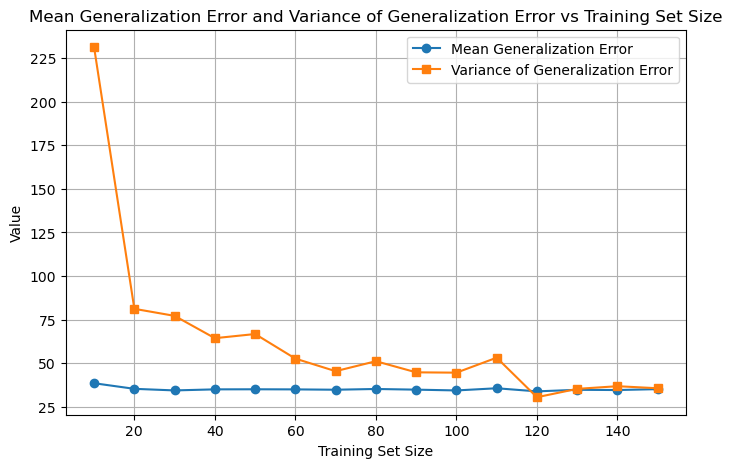

In [15]:
sizes = range(10, 150 + 1, 10)
means = []
variances = []

for size in sizes:
    mean_err, variance = experiment_several_train_sets(size, repeats=200)
    means.append(mean_err)
    variances.append(variance)

plt.figure(figsize=(8, 5))
plt.plot(sizes, means, marker='o', label='Mean Generalization Error')
plt.plot(sizes, variances, marker='s', label='Variance of Generalization Error')

plt.xlabel('Training Set Size')
plt.ylabel('Value')
plt.title('Mean Generalization Error and Variance of Generalization Error vs Training Set Size')
plt.legend()
plt.grid(True)

plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
As the training set grows, the mean of generalisation error remains almost the same, but its variance drops significantly which indicates that the model becomes more stable.
</div>

### Question 6

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">

Bias-variance tradeoff:

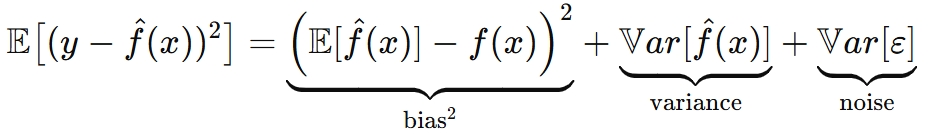
</div>

In [16]:
def experiment_bias_variance(dataset_size, repeats, k=2):
    preds = []

    for _ in range(repeats):
        train_set = data_sample(dataset_size)
        X_train = train_set.x.values[:, np.newaxis]
        y_train = train_set.y

        model = neighbors.KNeighborsRegressor(k)
        model.fit(X_train, y_train)

        preds.append(model.predict(X_test))

    preds = np.array(preds)  # shape (repeats, n_test)

    # mean predictor (E[f_hat])
    mean_pred = np.mean(preds, axis=0)

    # variance of model predictions Var[f_hat]
    variance = np.mean(np.var(preds, axis=0))

    # squared bias: (E[f_hat] - f)^2
    bias2 = np.mean((mean_pred - y_test)**2)

    # mean error (MSE averaged over runs)
    mean_err = np.mean([mean_squared_error(y_test, p) for p in preds])

    return mean_err, variance, bias2

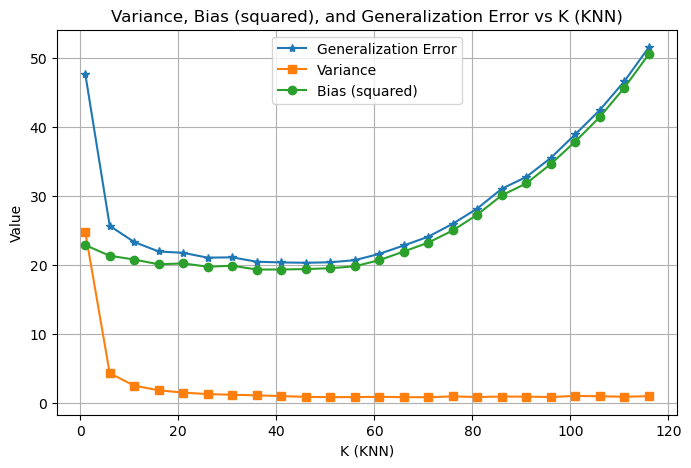

In [17]:
k_values = range(1, 120 + 1, 5)
errors = []
variances = []
biases = []

for kv in k_values:
    error, variance, bias2 = experiment_bias_variance(150, repeats=200, k=kv)
    errors.append(error)
    variances.append(variance)
    biases.append(bias2)

plt.figure(figsize=(8, 5))
plt.plot(k_values, errors, marker='*', label='Generalization Error')
plt.plot(k_values, variances, marker='s', label='Variance')
plt.plot(k_values, biases, marker='o', label='Bias (squared)')

plt.xlabel('K (KNN)')
plt.ylabel('Value')
plt.title('Variance, Bias (squared), and Generalization Error vs K (KNN)')
plt.legend()
plt.grid(True)

plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
As expected and discussed in the lecture, the error curve is <b>U-shaped</b>.
</div>

### Question 7

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">

Bias = error from using overly-simple prediction (large k).

Variance = instability from reacting to random sample noise (small k).

Our plots show:
- Low k -> low bias, high variance.
- High k -> high bias, low variance.

Best k minimizes bias + variance, producing smallest generalization error (for example, **k = 46** in our case).
</div>

## Unlimited sample simulation

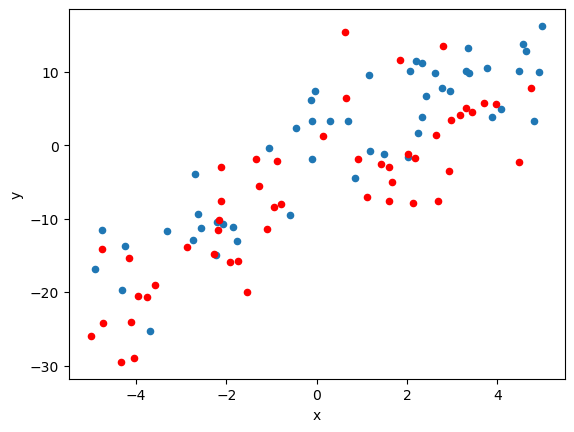

In [18]:
from unknown_distrib import data_sample
train2 = data_sample(50)

ax=train.plot(kind="scatter", x="x", y="y")
train2.plot(kind="scatter", x="x", y="y",ax=ax, color="red")
plt.show()

In [19]:
train2 = data_sample(50)
X = train2["x"].values[:,np.newaxis] # column matrix instead of line vector
y = train2["y"]

knn = neighbors.KNeighborsRegressor(k)
knn.fit(X, y)
yhat_train = knn.predict(X)
print(mean_squared_error(y, yhat_train))

test = data_sample(50)#pd.read_csv("./simpledata_test.csv")
X_test = test["x"].values[:,np.newaxis] # column matrix instead of line vector
y_test = test["y"]

yhat_test = knn.predict(X_test)
print(mean_squared_error(y_test, yhat_test))

9.820505572304233
39.57891384978387
